In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import dataset packages
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve

# import from project files
from utils import plot_2d, plot_classifier_boundary, test_model

## Dataset Generation ## 

### Logistic Regression ###

- Based on Maximum likelihood estimation
- 


Assumptions: 
- By default, logistic regression assumes that the outcome variable is binary (see: https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290)
- Linearity of independent variables and log-odds
- Logistic regression assumes that there are no highly influential outlier data points, as they distort the outcome and accuracy of the model
- When the classes are well-separated, the parameter estimates for logistic regression are surprisingly unstable. Coefficients may go to infinity. LDA doesn't suffer from this problem. --> If there are covariate values that can predict the binary outcome perfectly then the algorithm of logistic regression, i.e. Fisher scoring, does not even converge. This is the extreme case of perfect separation but even if the data are only separated to a great degree and not perfectly, the maximum likelihood estimator might not exist and even if it does exist, the estimates are not reliable.(see: https://stats.stackexchange.com/questions/188416/discriminant-analysis-vs-logistic-regression)
- 

- No assumption about distribution and in-group covariance of predictors.

Advantages: 
- Groups can have different n
- Not too sensitive to outliers (See: https://stats.stackexchange.com/questions/95247/logistic-regression-vs-lda-as-two-class-classifiers)


Disadvantages:
- main differences to LDA with small samples, as their distributions vary too much for the LR to be  able  to  give  good  result


### LDA ###

- Based on Least squares estimation


Assumptions:
- Distributional assumptions (multivariate normality of all predictors). Non-multivariate normally distributed predictors will even hurt the discriminant extraction phase.
- The within-group covariance matrices should be identical in population. (See: https://stats.stackexchange.com/questions/95247/logistic-regression-vs-lda-as-two-class-classifiers)
- 

Advantages: 
- po

Disadvantages: 
- Groups should have similar n
- Quite sensitive ti outliers

In [2]:
# add outliers
# unbalanced sample sizes --> different n

def data_lr():

    # lr_X, lr_y = make_blobs(
    #     n_samples=[500, 500], 
    #     centers=[(3,5),(5,5)],             
    #     n_features=2, 
    #     cluster_std=[1, 1],
    #     random_state=1, 
    #     shuffle=False)

    # lr_X, lr_y = make_moons(
    #     n_samples=[600, 100], 
    #     noise=0.5)

    # lr - 0.54
    # lda - 0.80
    lr_X, lr_y = make_classification(
        n_samples=100,
        n_features=2, 
        n_redundant=0, 
        n_informative=2, 
        class_sep=0.2,
        flip_y=0.01, 
        n_clusters_per_class=1,
        weights=[0.9, 0.1],
        random_state=1,
        )


    # lr_X, lr_y = make_classification(
    #     n_samples=150,
    #     n_features=2, 
    #     n_redundant=0, 
    #     n_informative=2,
    #     class_sep=0.5,          # seperation of classes, default 1.0
    #     # flip_y=0.5,             # random class assignment, default 0.01
    #     weights=[0.9, 0.1],      # balance of classes
    #     random_state=42
    #     )

    return lr_X, lr_y

In [3]:
# make gaussian distribution
# no outliers
# balanced sample sizes --> similar n



def data_lda():
    
    # logreg 0.83
    # lda 0.88
    # lda_X, lda_y = make_blobs(
    #     n_samples=[10, 90], 
    #     centers=[(2, 4),(8,5)],             
    #     n_features=2, 
    #     cluster_std=[2, 3],
    #     random_state=42, 
    #     shuffle=False)

    # lda_X, lda_y =  make_classification(
    #     n_samples=600,
    #     n_features=2,
    #     n_redundant=0,
    #     n_informative=2,
    #     random_state=2,
    #     n_clusters_per_class=1,
    # ),

    lda_X, lda_y = make_moons(
        n_samples=[100, 100], 
        noise=0.1)
                    
    return lda_X, lda_y

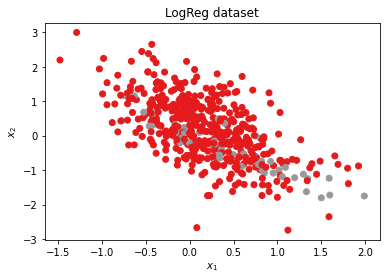

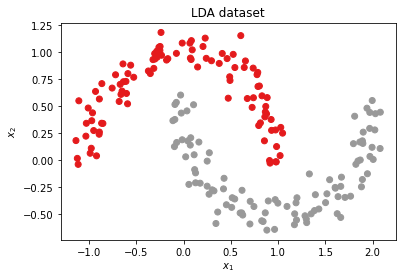

In [4]:
# LogReg data generation and splitup
lr_X, lr_y = data_lr()
plot_2d(lr_X, lr_y, 'LogReg dataset')

lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(lr_X, lr_y, test_size=.33, random_state=42)

# LDA data generation and splitup
lda_X, lda_y = data_lda()
plot_2d(lda_X, lda_y, 'LDA dataset')

lda_X_train, lda_X_test, lda_y_train, lda_y_test = train_test_split(lda_X, lda_y, test_size=.33, random_state=42)


## LogReg Dataset ##

LogReg on LogReg dataset:
AUC score: 0.500
AUC score list: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


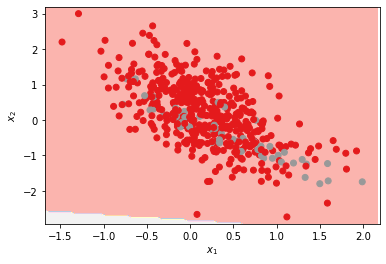

In [5]:
# LogReg

logreg = LogisticRegression()

print('LogReg on LogReg dataset:')
test_model(logreg, lr_X, lr_y, 20)
# plot_roc_curve(logreg, lr_X_test, lr_y_test) 

# logreg.fit(lr_X_train, lr_y_train)
# print('LogReg score: %.2f' % (logreg.score(lr_X_test, lr_y_test)))
# plot_classifier_boundary(logreg, lr_X, lr_y, title='LogReg on LR dataset')


LDA on LogReg Dataset: 
AUC score: 0.499
AUC score list: [0.5, 0.49337748344370863, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49310344827586206, 0.5, 0.5, 0.5, 0.4966442953020134, 0.4966216216216216, 0.4967105263157895, 0.4965986394557823, 0.5, 0.5, 0.5, 0.5, 0.5]


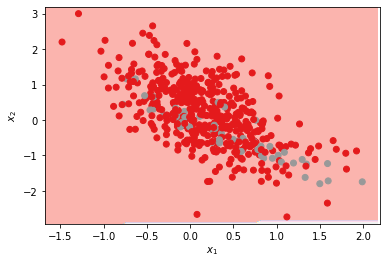

In [6]:
# LDA

lda = LDA()

print('LDA on LogReg Dataset: ')

test_model(lda, lr_X, lr_y, 20)
# plot_roc_curve(lda, lr_X_test, lr_y_test) 

# lda.fit(lr_X_train, lr_y_train)
# print('LDA score: %.2f' % (lda.score(lr_X_test, lr_y_test)))
# plot_classifier_boundary(lda, lr_X, lr_y, title='LDA on LR dataset')


## LDA Dataset ##

LogReg on LDA Dataset:
AUC score: 0.861
AUC score list: [0.8484848484848486, 0.880708294501398, 0.8648897058823529, 0.8777573529411764, 0.8721804511278196, 0.8590225563909775, 0.841880341880342, 0.880639097744361, 0.8603686635944701, 0.8805555555555555, 0.8181818181818183, 0.8915441176470589, 0.8786764705882353, 0.8166666666666668, 0.9422180801491146, 0.8674812030075187, 0.7867647058823529, 0.8795955882352942, 0.8636363636363638, 0.8030303030303031]


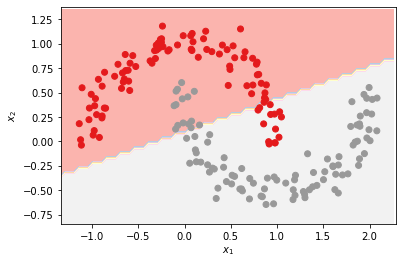

In [7]:
# LogReg

logreg = LogisticRegression()

print('LogReg on LDA Dataset:')

test_model(logreg, lda_X, lda_y, 20)
# plot_roc_curve(logreg, lda_X_test, lda_y_test) 

# logreg.fit(lda_X_train, lda_y_train)
# print('LogReg score: %.2f' % (logreg.score(lda_X_test, lda_y_test)))
# plot_classifier_boundary(logreg, lda_X, lda_y, title='LogReg on LDA dataset')

LDA on LDA Dataset:
AUC score: 0.875
AUC score list: [0.8783410138248848, 0.9087557603686636, 0.8806390977443609, 0.8933823529411764, 0.9111111111111111, 0.867741935483871, 0.8805147058823529, 0.8611111111111112, 0.8933823529411764, 0.911111111111111, 0.8193548387096774, 0.8222222222222222, 0.8801843317972351, 0.8786764705882353, 0.8787878787878789, 0.8648897058823529, 0.8923076923076922, 0.8622119815668202, 0.8027777777777779, 0.9105990783410138]


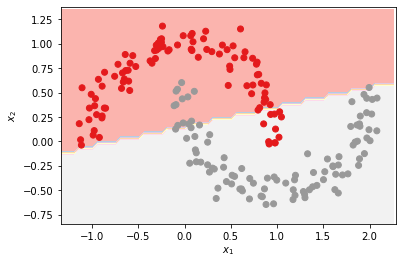

In [8]:
# LDA

lda = LDA()

print('LDA on LDA Dataset:')

test_model(lda, lda_X, lda_y, 20)
# plot_roc_curve(lda, lda_X_test, lda_y_test) 

# lda.fit(lda_X_train, lda_y_train)
# print('LDA score: %.2f' % (lda.score(lda_X_test, lda_y_test)))
# plot_classifier_boundary(lda, lda_X, lda_y, title='LDA on LDA dataset')